In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [28]:
# generate dataset
X, _ = make_blobs(n_samples=500, centers=10, cluster_std=1.0, random_state=42)

In [29]:
# standardizing data
scalar = StandardScaler()
X = scalar.fit_transform(X)


In [30]:
# elbow methos to find optimal k
inertia = []
k_values = range(1, 11)

for k in k_values:
    k_means = KMeans(n_clusters=k, random_state=42, n_init=10)
    k_means.fit(X)
    inertia.append(k_means.inertia_)

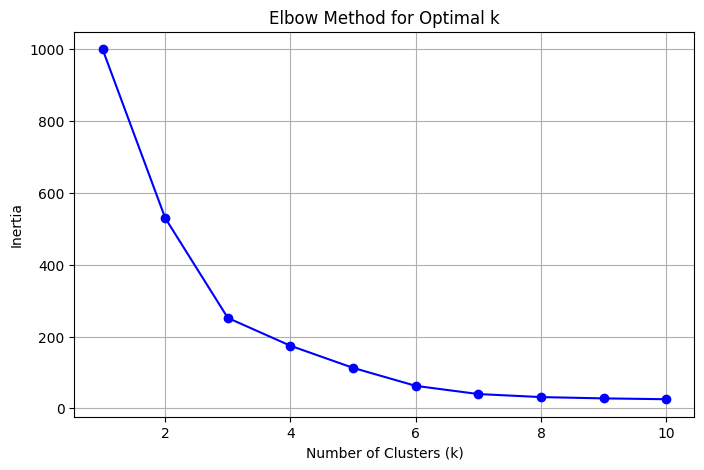

In [31]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
# Apply KMeans with optimal k
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

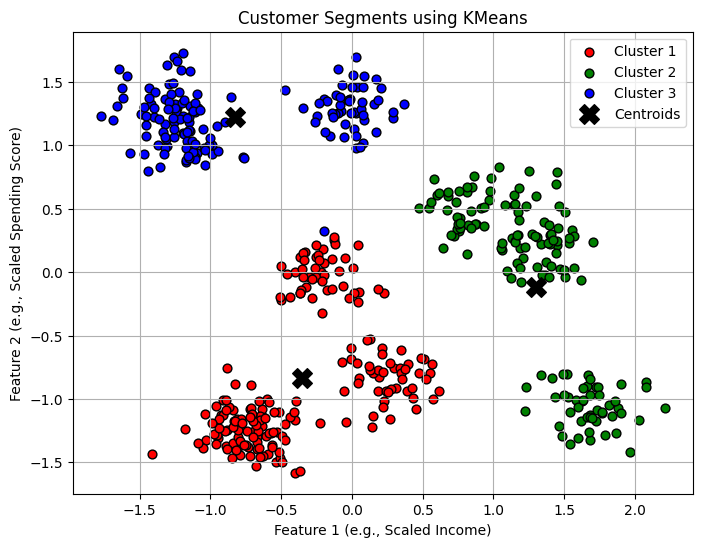

In [35]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'orange']
for i in range(k_optimal):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1],
                c=colors[i], label=f'Cluster {i+1}', s=40, edgecolors='k')

# Plot cluster centers
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title('Customer Segments using KMeans')
plt.xlabel('Feature 1 (e.g., Scaled Income)')
plt.ylabel('Feature 2 (e.g., Scaled Spending Score)')
plt.legend()
plt.grid(True)
plt.show()
